In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

I choose the dataset, "iris" which has length & width of sepal/petal of iris. Also, it can be grouped by species. 

In [2]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Choose one variable and plot that variable four different ways.

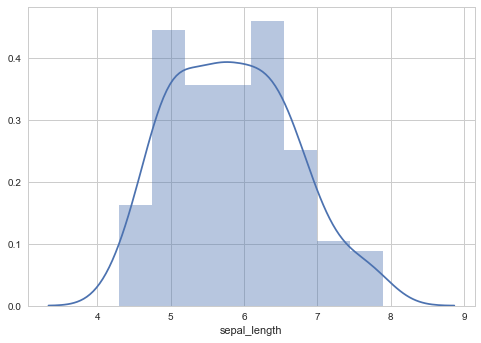

In [4]:
# Histogram
sns.set(style='whitegrid')
sns.distplot(iris.sepal_length);
plt.show()

To plot a numerical variable, "Sepal_length" in the dataset, first, I use the histogram in Seaborn. It draws the normalized histogram with kernel density estimte (KDE) as default. The plot helps us we can see that it is postiviely-skewed a little. But, that's all, if you want to see any details of the parameter, you need to utilize another plot such as boxplot.

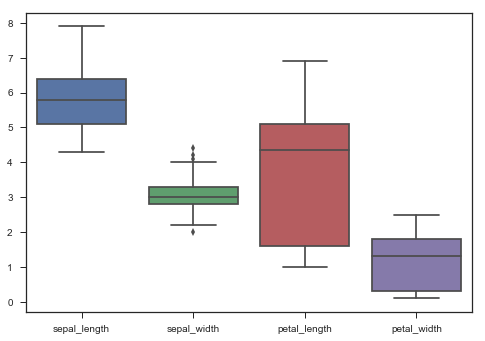

In [5]:
# boxplot
sns.set(style='ticks')
sns.boxplot(data=iris)
plt.show()

In this time, I draw the boxplots for four variables, length/width of sepal and length/width of petal. Similar to the boxplot in matplotlib, it is appropriate to see their median, IQR, and so on. We can see that there are difference between the variables in view of median and variance. Also, we are able to recognize the outliers in 'sepal_width'. However, the multinodes in 'petal_length' and 'petal_widths' are not discovered in this plot.

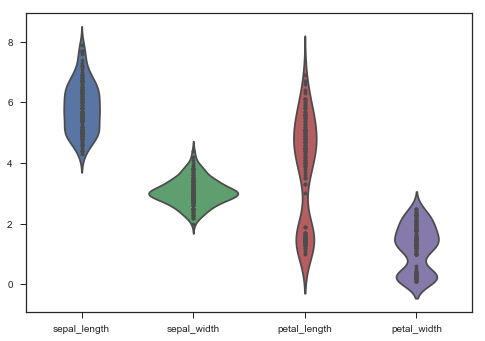

In [6]:
# violinplot
sns.violinplot(data=iris, inner="points")
plt.show()

With the prescribed parameters, I draw the violinplot which are similar to boxplot including its distribution, KDE. Also, all of the actual datapoints are plotted in the figure. 

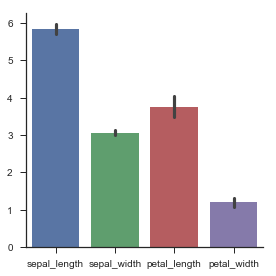

In [7]:
# barplot
sns.factorplot(data=iris, kind='bar', ci=95)
plt.show()

Lastly, the boxplot, one of the most common plot of seaborn, is drawn. The length of the boxes represents the mean and the the black hair at the top is confidence inteveral of 95%. However, it alwas includes zero, so a lot of space in the plot are wasted. 

### Choose two continuous variables, and plot them three different ways.

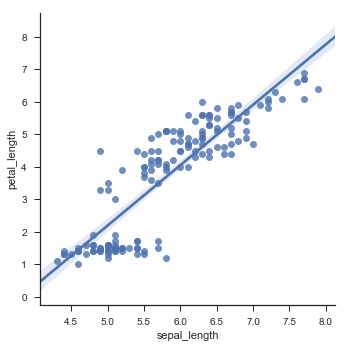

In [8]:
# scatterplot
sns.lmplot(x='sepal_length', y='petal_length', data=iris)
plt.show()

The scatterplot with 'sepal_length' and 'petal_length' are drawn. We can see that there is linear relationship between the lengths of sepal and petal. Furthermore, the linear regression line are drawn with 95% confidence interval. However, there is clustering around the right-bottom, but the linear regression model does not explain it.

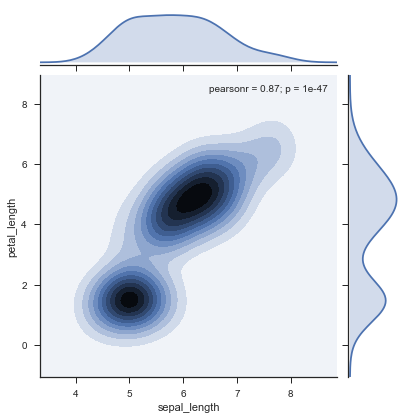

In [9]:
# jointplot
sns.jointplot(x='sepal_length', y='petal_length', data=iris, kind="kde")
plt.show()

The heatmap of joint kernel density shows that there are two-mode in the joint plot. Also, the marginal distribution of each parameters are drawn around the edges. We can see the Perason's R and p-value in the figure, we can neglect the null hypothesis. 

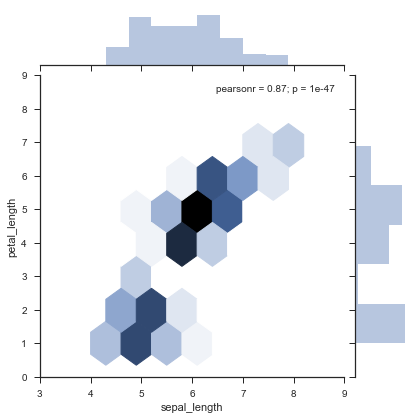

In [10]:
#hexbinplot
sns.set(style="ticks")
sns.jointplot(x='sepal_length', y='petal_length', data=iris, kind="hex", xlim=(3, 9), ylim=(0, 9))
plt.show()

The hexbinplot is drawn, but the size of bin of hex seems quite rough. This plot works best with relatively large datasets, but the number of the case, 150, is relative small.

### Choose one continuous variable and one categorical variable, and plot them six different ways.

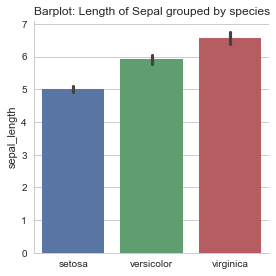

In [11]:
# barplot
sns.set(style ='whitegrid')

sns.factorplot(x='species', y='sepal_length', data=iris, kind='bar', ci=95)
plt.xlabel('')
plt.title('Barplot: Length of Sepal grouped by species')
plt.show()

The barplot is commonly used, it was good show the variable grouped by the categorical parameter, 'species'. But, it wasts lots of space in the graph because the bar starts from 0. 

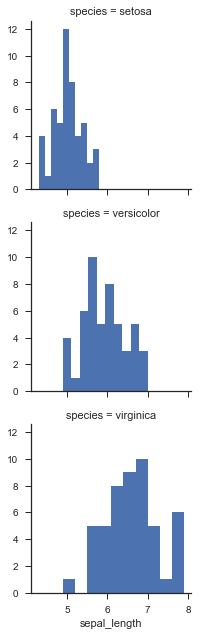

In [12]:
# histograms
sns.set(style="ticks")

g = sns.FacetGrid(iris, row='species')
g.map(plt.hist, 'sepal_length',  lw=0)
plt.show()

I draw the conditional histogram of 'sepal_length' between species. By the identical scales of x & y axises, we can see that the difference between the central tendencies of 'sepal_length' according to their speices.

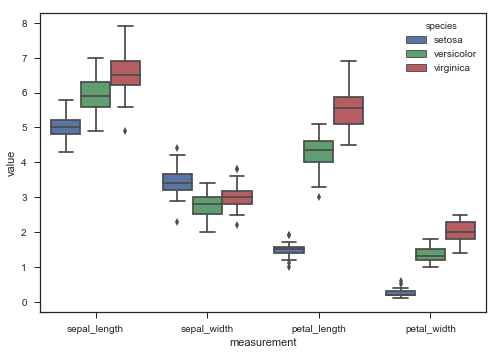

In [13]:
# boxplot

# "Melt" the dataset to "long-form" or "tidy" representation
iris2 = pd.melt(iris, "species", var_name="measurement")

sns.boxplot(x='measurement', y='value', hue='species', data=iris2)
plt.show()

In this time, I draw several boxplots for each variabled grouped by their species. First, I melt the origianl 'iris' dataset by combining measurements into one column. Now, we can understand the multi-nodes in 'petal_length' and 'petal_width'. The widht/legnth of petal of 'setosa' species are divided from the other species. This discovery tells us that we need to divide the daset by species to do linear regression.

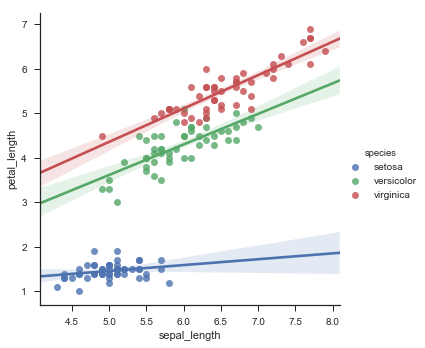

In [14]:
# Scatterplot & linear regressions
sns.lmplot(x="sepal_length", y="petal_length",hue="species",data=iris)
plt.show()

Now, we draw three scatterplots colored by their species. We can see that there is strong linear relationship within their group. Compared to the previous scatter plot and its linear regression, these new regression explains well the relationship between 'sepal_length' and 'petal_length'.

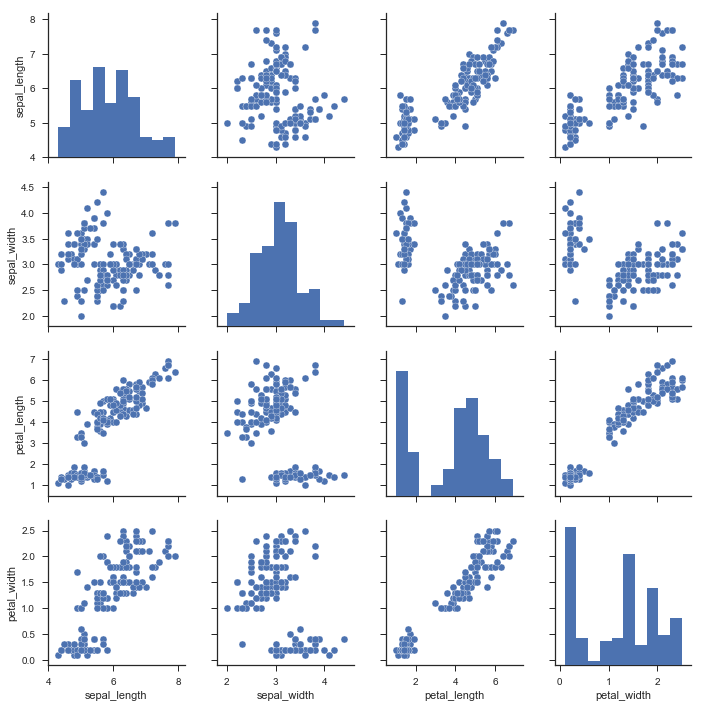

In [15]:
# Original Pairplot 
sns.pairplot(iris);

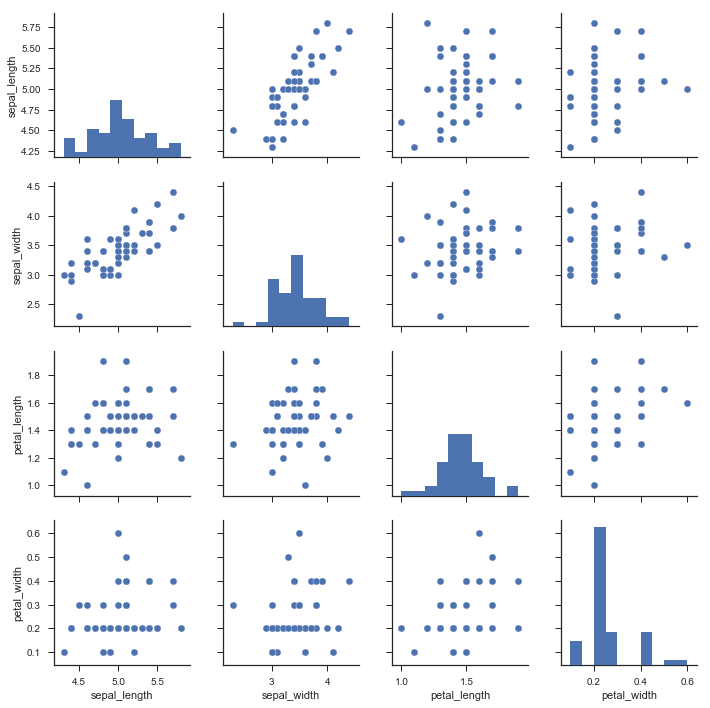

In [16]:
# Pairplots grouped by 'species'
iris_setosa = iris[iris.species=='setosa']
sns.pairplot(iris_setosa);

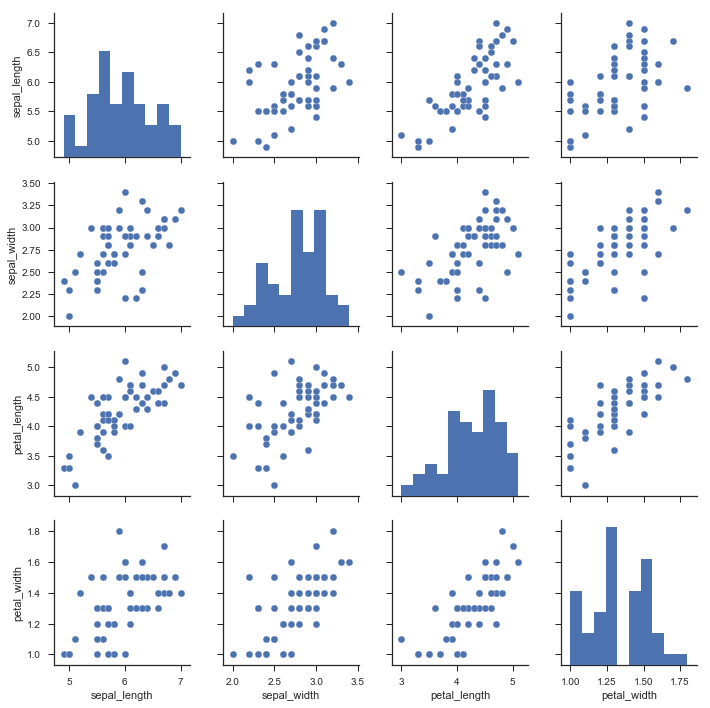

In [17]:
iris_versicolor = iris[iris.species=='versicolor']
sns.pairplot(iris_versicolor);

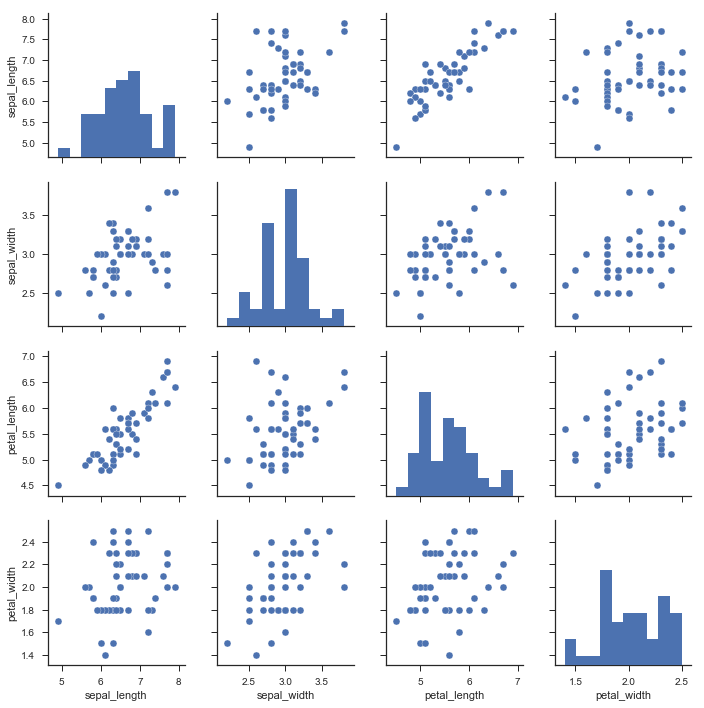

In [18]:
iris_virginica = iris[iris.species=='virginica']
sns.pairplot(iris_virginica);

Lastly, I draw the pairplots according to its own species. Compared to the origianl pairplot drawn at first including multiple modes, each of pairplots seems more clear linear relationships between two factors. 